# Effective Graph Paper
Code to generate "Figure X - Effective Graph Modules"

In [157]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [158]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from itertools import cycle

In [228]:
df  = pd.read_csv("EffectiveGraphModules.csv")

In [229]:
# Rename
df.loc[df['NetName'] == 'Arabidopsis Thaliana', 'NetName'] = 'Arabidopsis thaliana'

In [234]:
netnames = df['NetName'].unique().tolist()
for i,v in enumerate(netnames):
    print(i,v)
print('---')
# Reorder
netnames.insert(0, netnames.pop(42))
netnames.insert(0, netnames.pop(42))
netnames.insert(0, netnames.pop(40))
#
for i,v in enumerate(netnames):
    print(i,v)

0 T Cell Receptor Signaling (TT).txt
1 B cell differentiation (TT).txt
2 Processing of Spz Network from the Drosophila Signaling Pathway (TT).txt
3 T-Cell Signaling 2006 (TT).txt
4 Bordetella bronchiseptica (TT).txt
5 Cell Cycle Transcription by Coupled CDK and Network Oscillators (TT).txt
6 Budding Yeast Cell Cycle (TT).txt
7 Body Segmentation in Drosophila 2013 (TT).txt
8 FGF pathway of Drosophila Signalling Pathways (TT).txt
9 Oxidative Stress Pathway (TT).txt
10 Mammalian Cell Cycle (TT).txt
11 Mammalian Cell Cycle 2006 (TT).txt
12 BT474 Breast Cell Line Short-term ErbB Network (TT).txt
13 Budding Yeast Cell Cycle 2009 (TT).txt
14 Cholesterol Regulatory Pathway (TT).txt
15 Glucose Repression Signaling 2009 (TT).txt
16 Toll Pathway of Drosophila Signaling Pathway (TT).txt
17 Wg Pathway of Drosophila Signalling Pathways (TT).txt
18 IL-6 Signalling (TT).txt
19 Trichostrongylus retortaeformis (TT).txt
20 B bronchiseptica and T retortaeformis coinfection (TT).txt
21 IL-1 Signaling (TT).

In [235]:
# Set Categorical
df['NetName'] = pd.Categorical(df['NetName'], categories=netnames, ordered=True)

In [236]:
# Sort
df = df.sort_values(['NetName','ev'], ascending=[True, True])

In [237]:
df['NetName'].iloc[50:100]

668         Leukemia
669         Leukemia
670         Leukemia
671         Leukemia
672         Leukemia
673    Breast Cancer
674    Breast Cancer
675    Breast Cancer
676    Breast Cancer
677    Breast Cancer
678    Breast Cancer
679    Breast Cancer
680    Breast Cancer
681    Breast Cancer
682    Breast Cancer
683    Breast Cancer
684    Breast Cancer
685    Breast Cancer
686    Breast Cancer
687    Breast Cancer
688    Breast Cancer
689    Breast Cancer
690    Breast Cancer
691    Breast Cancer
692    Breast Cancer
693    Breast Cancer
694    Breast Cancer
695    Breast Cancer
696    Breast Cancer
697    Breast Cancer
698    Breast Cancer
699    Breast Cancer
700    Breast Cancer
701    Breast Cancer
702    Breast Cancer
703    Breast Cancer
704    Breast Cancer
705    Breast Cancer
706    Breast Cancer
707    Breast Cancer
708    Breast Cancer
709    Breast Cancer
710    Breast Cancer
711    Breast Cancer
712    Breast Cancer
713    Breast Cancer
714    Breast Cancer
715    Breast

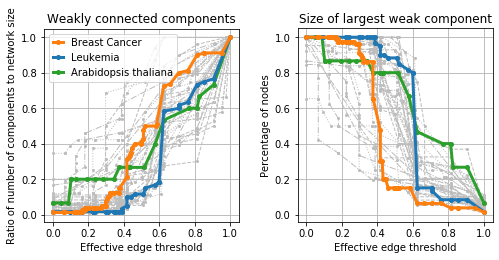

In [255]:
fig = plt.figure(figsize=(7, 3.5))
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

# first row
axl = fig.add_subplot(gs[0, 0])
axr = fig.add_subplot(gs[0, 1])

colors = {
    'Breast Cancer': '#ff7f0e',
    'Leukemia': '#1f77b4',
    'Arabidopsis thaliana': '#2ca02c',
    'other': '#bdbdbd'}
nets = colors.keys()
lscycle = cycle(['--', ':', '-.'])

handles = []
labels = []
for net, dft in df.groupby('NetName'):
    # Color
    if net in nets:
        color = colors[net]
        zorder = 10
        lw = 3
        ms = 4
        ls = '-'
    else:
        color = colors['other']
        zorder = 2
        lw = 1
        ms = 2
        ls = next(lscycle)
    #
    xs = dft['ev']
    pl, = axl.plot(xs, dft['normed_ncomp'], c=color, label=net, marker='o', ms=ms, lw=lw, ls=ls, zorder=zorder)
    pr, = axr.plot(xs, dft['percentlargest'], c=color, label=net, marker='o', ms=ms, lw=lw, ls=ls, zorder=zorder)
    
    if net in nets:
        handles.append(pl)
        labels.append(net)

axl.set_title("Weakly connected components")
axr.set_title("Size of largest weak component")
axl.set_xlabel('Effective edge threshold')
axr.set_xlabel('Effective edge threshold')
axl.set_ylabel('Ratio of number of components to network size')
axr.set_ylabel('Percentage of nodes')
axl.set_aspect(1)
axr.set_aspect(1)
axl.grid(zorder=1)
axr.grid(zorder=1)

# Manual ordering for legend
handles = handles[::-1]
labels = labels[::-1]
# Legend
axl.legend(handles=handles, labels=labels, loc='best', handlelength=1.0)

#plt.tight_layout()
plt.subplots_adjust(left=0.09, right=0.98, bottom=0.05, top=0.99, wspace=0.30, hspace=0.0)
plt.savefig("EffectiveGraphModules.pdf")
plt.show()